#### IMPORTING LIBRARIES

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [134]:
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')

/tmp/ipykernel_20603/466759996.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')


This warning implies corrupt data in some of the columns which do not match the dtype of the specified column.We will handle this first by cleaning the data.

#### CLEANING THE DATA

In [135]:
train.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [136]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [137]:
drop_columns=['ID',"Customer_ID","Name","SSN"]

The columns "ID," "Customer_ID," "Name," and "SSN" likely contain sensitive personal information. So we drop these columns to avoid building a model which involves sensitive personal information. 



In [138]:
#Dropping the columns
train=train.drop(drop_columns,axis=1)
test=test.drop(drop_columns,axis=1)

In [139]:
#segregating the columns into numerical and categorical
categorical_columns = [cols for cols in train.columns if train[cols].dtype == object and cols != 'Credit_Score' ]
numerical_columns = [cols for cols in train.columns if train[cols].dtype != object]

In [140]:
categorical_columns

['Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [141]:
numerical_columns

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month']

In [142]:
train[categorical_columns].head()

Month   Age Occupation Annual_Income Num_of_Loan  \
0   January    23  Scientist      19114.12           4   
1  February    23  Scientist      19114.12           4   
2     March  -500  Scientist      19114.12           4   
3     April    23  Scientist      19114.12           4   
4       May    23  Scientist      19114.12           4   

                                        Type_of_Loan Num_of_Delayed_Payment  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                      7   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                    NaN   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                      7   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                      4   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    NaN   

  Changed_Credit_Limit Credit_Mix Outstanding_Debt     Credit_History_Age  \
0                11.27          _           809.98  22 Years and 1 Months   
1                11.27       Good           809.98                    NaN   
2                    _       Good           809.98  22 Years and 3 Months   
3                 6.27       Good           809.98  22 Years and 4 Months   
4                11.27       Good           809.98  22 Years and 5 Months   

  Payment_of_Min_Amount Amount_invested_monthly  \
0                    No       80.41529543900253   
1                    No      118.28022162236736   
2                    No         81.699521264648   
3                    No       199.4580743910713   
4                    No      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance  
0   High_spent_Small_value_payments  312.49408867943663  
1    Low_spent_Large_value_payments  284.62916249607184  
2   Low_spent_Medium_value_payments   331.2098628537912  
3    Low_spent_Small_value_payments  223.45130972736786  
4  High_spent_Medium_value_payments  341.48923103222177

In [143]:
#Annual_Income and Num_of_Loan which should be numerical columns became object because of corrupt data, so we shall replace these particular values

train['Annual_Income']=train["Annual_Income"].apply(lambda x:x.replace("_","") if '_' in x else x)
test['Annual_Income']=test["Annual_Income"].apply(lambda x:x.replace("_","") if '_' in x else x)
train["Num_of_Loan"]=train["Num_of_Loan"].apply(lambda x:x.replace("_","")if "_" in x else x)
test["Num_of_Loan"]=test["Num_of_Loan"].apply(lambda x:x.replace("_","")if "_" in x else x)

In [144]:
train['Annual_Income']=train["Annual_Income"].astype(float)
test['Annual_Income']=test["Annual_Income"].astype(float)

In [145]:
categorical_columns.remove('Annual_Income')
numerical_columns.append('Annual_Income')

In [146]:
train["Num_of_Loan"]=train["Num_of_Loan"].astype(int)
test["Num_of_Loan"]=test["Num_of_Loan"].astype(int)

In [147]:
categorical_columns.remove('Num_of_Loan')
numerical_columns.append('Num_of_Loan')

In [148]:
train[categorical_columns].head()

Month   Age Occupation  \
0   January    23  Scientist   
1  February    23  Scientist   
2     March  -500  Scientist   
3     April    23  Scientist   
4       May    23  Scientist   

                                        Type_of_Loan Num_of_Delayed_Payment  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                      7   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                    NaN   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                      7   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                      4   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    NaN   

  Changed_Credit_Limit Credit_Mix Outstanding_Debt     Credit_History_Age  \
0                11.27          _           809.98  22 Years and 1 Months   
1                11.27       Good           809.98                    NaN   
2                    _       Good           809.98  22 Years and 3 Months   
3                 6.27       Good           809.98  22 Years and 4 Months   
4                11.27       Good           809.98  22 Years and 5 Months   

  Payment_of_Min_Amount Amount_invested_monthly  \
0                    No       80.41529543900253   
1                    No      118.28022162236736   
2                    No         81.699521264648   
3                    No       199.4580743910713   
4                    No      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance  
0   High_spent_Small_value_payments  312.49408867943663  
1    Low_spent_Large_value_payments  284.62916249607184  
2   Low_spent_Medium_value_payments   331.2098628537912  
3    Low_spent_Small_value_payments  223.45130972736786  
4  High_spent_Medium_value_payments  341.48923103222177

In [149]:
#The next column we will try to modify is age as clearly age is a numerical column
train['Age'].unique()


array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [150]:
train['Age']=train["Age"].apply(lambda x:x.replace("_","") if '_' in x else x)
test['Age']=test["Age"].apply(lambda x:x.replace("_","") if '_' in x else x)

In [151]:
train['Age'].unique()

array(['23', '-500', '28', ..., '4808', '2263', '1342'], dtype=object)

In [152]:
train["Age"]=train["Age"].astype(int)
test["Age"]=test["Age"].astype(int)

In [153]:
#Dropping the negative values
mask = train['Age'] < 0
train = train.loc[~mask]
mask = test['Age'] < 0
test = test.loc[~mask]


In [154]:
train['Age'].unique()

array([  23,   28,   34, ..., 4808, 2263, 1342])

In [155]:
train.shape

(99114, 24)

In [156]:
#dropping the values which have age > 120
mask = train['Age'] >120
train = train.loc[~mask]


In [157]:
train.shape

(97230, 24)

In [158]:
train['Age'].unique()

array([ 23,  28,  34,  54,  55,  21,  31,  33,  30,  24,  44,  45,  40,
        41,  32,  35,  36,  39,  37,  20,  46,  26,  42,  19,  48,  38,
        43,  22,  16,  18,  15,  27,  25,  14,  17,  47,  53,  56,  29,
        49,  51,  50,  52, 112, 118,  99, 100, 102, 111,  95, 109, 115])

The values now have a more suitable range and thus can be added to the numerical columns.

In [159]:
categorical_columns.remove('Age')
numerical_columns.append('Age')

In [160]:
train[categorical_columns].head()

Month Occupation                                       Type_of_Loan  \
0   January  Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
1  February  Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
3     April  Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
4       May  Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   
5      June  Scientist  Auto Loan, Credit-Builder Loan, Personal Loan,...   

  Num_of_Delayed_Payment Changed_Credit_Limit Credit_Mix Outstanding_Debt  \
0                      7                11.27          _           809.98   
1                    NaN                11.27       Good           809.98   
3                      4                 6.27       Good           809.98   
4                    NaN                11.27       Good           809.98   
5                      4                 9.27       Good           809.98   

      Credit_History_Age Payment_of_Min_Amount Amount_invested_monthly  \
0  22 Years and 1 Months                    No       80.41529543900253   
1                    NaN                    No      118.28022162236736   
3  22 Years and 4 Months                    No       199.4580743910713   
4  22 Years and 5 Months                    No      41.420153086217326   
5  22 Years and 6 Months                    No      62.430172331195294   

                  Payment_Behaviour     Monthly_Balance  
0   High_spent_Small_value_payments  312.49408867943663  
1    Low_spent_Large_value_payments  284.62916249607184  
3    Low_spent_Small_value_payments  223.45130972736786  
4  High_spent_Medium_value_payments  341.48923103222177  
5                            !@9#%8   340.4792117872438

In [161]:
#TODO : Figure out whether to drop the test.csv file altogether
#Change values in the remaining categorical columns and fix the numerical columns
train.shape

(97230, 24)

1. Monthly Balance (done)
2. Amount_invested_monthly(done)
3. Outstanding_Debt(done)
4. Changed_Credit_Limit(drop?)
5. Payment_of_Min_Amount

Tasks:
1. Make a plot function for both catgeorical and numerical values
2. Figure out what to do with numerical values(scaling)


- Min-max scaling
- Binning


In [162]:
train.isna().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14597
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11076
Delay_from_due_date             0
Num_of_Delayed_Payment       6826
Changed_Credit_Limit            0
Num_Credit_Inquiries         1906
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8794
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4344
Payment_Behaviour               0
Monthly_Balance              1179
Credit_Score                    0
dtype: int64

In [163]:
drop_columns = ['Monthly_Inhand_Salary','Type_of_Loan']
train = train.drop(drop_columns,axis=1) #dropping the columns as they have missing values for more than 10% of the dataset
categorical_columns.remove('Type_of_Loan')
numerical_columns.remove('Monthly_Inhand_Salary')
train.shape

(97230, 22)

### Cleaning and Plotting Functions

In [164]:
#For plotting histogram of integer data
def plot_distribution(data, bins=10, xlabel='', ylabel='', color='skyblue'):
    # Create a histogram of the data
    plt.hist(data, bins=bins, color=color, edgecolor='black', alpha=0.7)
    title = 'Distribution of ' + xlabel
    # Set the title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show the plot
    plt.show()


In [165]:
#For plotting Distribution plot
def dist_plot(column = "",df = train):
    plt.figure(figsize=(6,4))
    sns.displot(df[column])
    plt.title(column, size=15)
    plt.show()

In [166]:
def filter_col(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value


def filter_(value: str):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value

In [167]:
def replace(column,character = "_"):
    train[column]=train[column].apply(lambda x:x.replace(character,"") if character in x else x)

In [168]:
def category_distributions(x,data = train,title = '',size = 15):
    plt.figure(figsize=(10,6))
    sns.countplot(x=x,data = data)
    plt.title(title, size=size)
    plt.show()

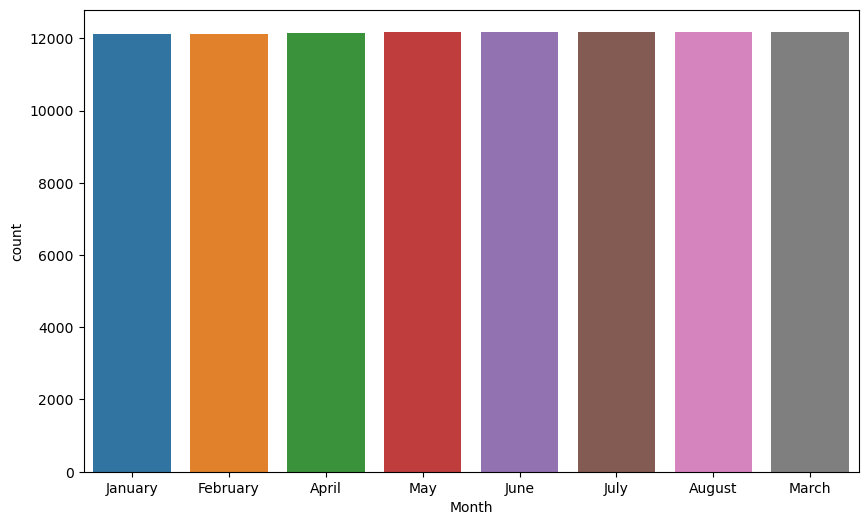

In [169]:
category_distributions(x = 'Month')

In [170]:
train['Month'].unique()

array(['January', 'February', 'April', 'May', 'June', 'July', 'August',
       'March'], dtype=object)

- We see that the distribution is even with no missing values and even distribution so we can go ahead without any changes

In [171]:
train['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '223.45130972736786',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [172]:
train["Monthly_Balance"].value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
312.49408867943663                  1
307.89891340252535                  1
425.71252921072                     1
401.81301155241687                  1
                                   ..
309.4159683487181                   1
272.22357341904336                  1
257.2822542162112                   1
247.5347047656841                   1
393.6736955618808                   1
Name: count, Length: 96043, dtype: int64

- Need to fix this particular value

In [173]:

train['Monthly_Balance'].isna().sum()/train['Monthly_Balance'].size * 100


1.2125887071891392

- As the number of missing values is less than 3% we can fill the value with the median of the data

In [174]:
train['Monthly_Balance'] = train['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)
train['Monthly_Balance'].median(skipna=True)

336.6603987296653

In [175]:
train['Monthly_Balance'].fillna(336.6603987296653, inplace=True)
train['Monthly_Balance'].isna().sum()

0

In [176]:
train['Monthly_Balance'] = train['Monthly_Balance'].astype(float)

/home/firewiz/Documents/code/credit-score-classification/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x400 with 0 Axes>

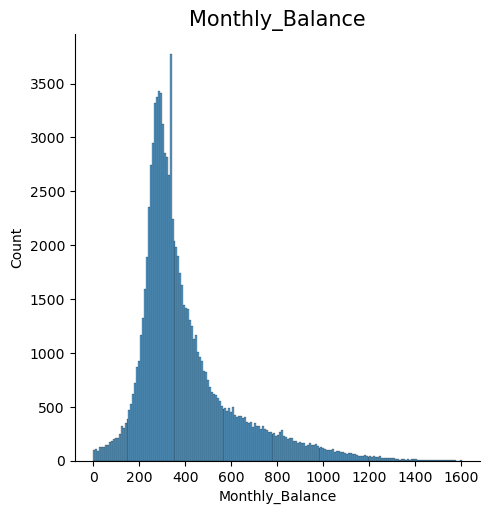

In [177]:
dist_plot(column='Monthly_Balance')

In [178]:
# log_balance = np.log(train['Amount_invested_monthly'])
# plt.figure(figsize=(6,4))
# sns.displot(log_balance)
# plt.title("amount_invested", size=15)
# plt.show()


In [179]:
# import scipy.stats as stats #to check the skewness of the data
# skewness = stats.skew(log_balance)
# skewness

In [180]:
# train['Monthly_Balance'] = log_balance

In [181]:
#Amount_invested_monthly
train['Amount_invested_monthly'].isna().sum()

4344

In [182]:
train["Amount_invested_monthly"].value_counts()

Amount_invested_monthly
__10000__            4174
0.0                   163
80.41529543900253       1
318.1115571758724       1
36.66235139442514       1
                     ... 
33.6098814431885        1
76.87001005130772       1
908.6939096189257       1
458.552411389832        1
167.1638651610451       1
Name: count, Length: 88551, dtype: int64

In [183]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('__10000__', np.nan)
train['Amount_invested_monthly'].isna().sum()/train['Amount_invested_monthly'].size * 100


8.760670574925435

In [184]:
train['Amount_invested_monthly'].median(skipna=True)

129.04586772143045

In [185]:
train['Amount_invested_monthly'].fillna(129.04586772143045,inplace=True)
train["Amount_invested_monthly"].value_counts()

Amount_invested_monthly
129.04586772143045    8518
0.0                    163
80.41529543900253        1
318.1115571758724        1
36.66235139442514        1
                      ... 
33.6098814431885         1
76.87001005130772        1
908.6939096189257        1
458.552411389832         1
167.1638651610451        1
Name: count, Length: 88551, dtype: int64

/home/firewiz/Documents/code/credit-score-classification/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x400 with 0 Axes>

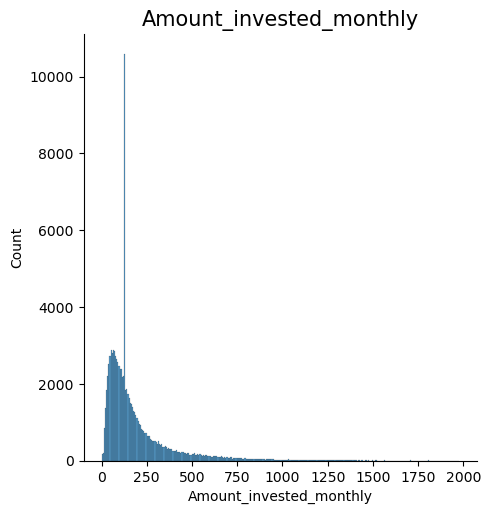

In [186]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype(float)
dist_plot(column='Amount_invested_monthly')

- We notice that the data has a right skewed nature so we will be checking what happens to the data if we use log transform

In [187]:
# log_amount = np.log(train['Amount_invested_monthly'])
# plt.figure(figsize=(6,4))
# sns.displot(log_amount)
# plt.title("amount_invested", size=15)
# plt.show()

In [188]:
# Outstanding_Debt
# train['Outstanding_Debt'].isna().sum()
train['Outstanding_Debt'].value_counts()

Outstanding_Debt
1151.7      23
1360.45     22
1109.03     22
460.46      20
156.76      16
            ..
1265.83_     1
3025.44_     1
2010.01_     1
447.18_      1
221.86_      1
Name: count, Length: 13148, dtype: int64

In [189]:
replace(column = 'Outstanding_Debt')
train['Outstanding_Debt'].value_counts()

Outstanding_Debt
1151.7     24
1109.03    23
1360.45    22
460.46     21
1445.81    16
           ..
378.58      5
1374.56     5
421.54      5
1452.04     5
904.93      4
Name: count, Length: 12203, dtype: int64

/home/firewiz/Documents/code/credit-score-classification/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x400 with 0 Axes>

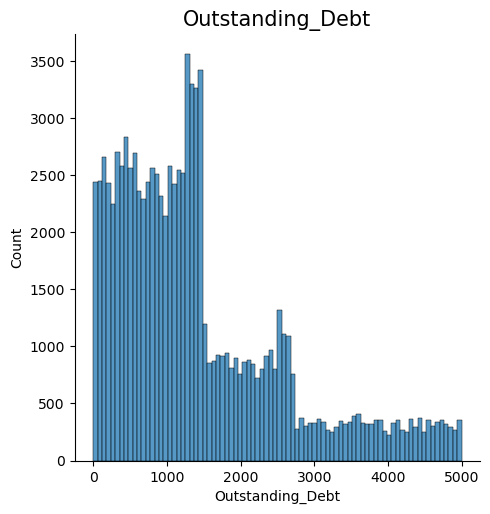

In [190]:
train['Outstanding_Debt'] = train['Outstanding_Debt'].astype(float)
dist_plot(column='Outstanding_Debt')

In [191]:
# Changed_Credit_Limit
train['Changed_Credit_Limit'].value_counts()


Changed_Credit_Limit
_                      2037
8.22                    133
11.5                    125
11.32                   122
7.35                    119
                       ... 
-0.2                      1
30.45                     1
-1.2200000000000002       1
35.83                     1
21.17                     1
Name: count, Length: 4375, dtype: int64

In [192]:
replace(column='Changed_Credit_Limit')
train['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
                       2037
8.22                    133
11.5                    125
11.32                   122
7.35                    119
                       ... 
-0.2                      1
30.45                     1
-1.2200000000000002       1
35.83                     1
21.17                     1
Name: count, Length: 4375, dtype: int64

In [193]:
# train['Changed_Credit_Limit']=train['Changed_Credit_Limit'].apply(lambda x:x.replace("","NaN") if "" in x else x)
# train['Changed_Credit_Limit'].mean(skipna=True)

# train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].astype(float)
# dist_plot(column='Changed_Credit_Limit')

In [194]:
# Payment_of_Min_Amount
train['Payment_of_Min_Amount'].isna().sum()
train['Payment_of_Min_Amount'].value_counts()


Payment_of_Min_Amount
Yes    50914
No     34649
NM     11667
Name: count, dtype: int64

In [195]:
train['Payment_of_Min_Amount']=train['Payment_of_Min_Amount'].apply(lambda x:x.replace("NM","No") if "NM" in x else x)
train['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    50914
No     46316
Name: count, dtype: int64

In [196]:
train[categorical_columns]

Month Occupation Num_of_Delayed_Payment Changed_Credit_Limit  \
0       January  Scientist                      7                11.27   
1      February  Scientist                    NaN                11.27   
3         April  Scientist                      4                 6.27   
4           May  Scientist                    NaN                11.27   
5          June  Scientist                      4                 9.27   
...         ...        ...                    ...                  ...   
99995     April   Mechanic                      7                 11.5   
99996       May   Mechanic                      7                 11.5   
99997      June   Mechanic                      6                 11.5   
99998      July   Mechanic                    NaN                 11.5   
99999    August   Mechanic                      6                 11.5   

      Credit_Mix  Outstanding_Debt      Credit_History_Age  \
0              _            809.98   22 Years and 1 Months   
1           Good            809.98                     NaN   
3           Good            809.98   22 Years and 4 Months   
4           Good            809.98   22 Years and 5 Months   
5           Good            809.98   22 Years and 6 Months   
...          ...               ...                     ...   
99995          _            502.38   31 Years and 6 Months   
99996          _            502.38   31 Years and 7 Months   
99997       Good            502.38   31 Years and 8 Months   
99998       Good            502.38   31 Years and 9 Months   
99999       Good            502.38  31 Years and 10 Months   

      Payment_of_Min_Amount  Amount_invested_monthly  \
0                        No                80.415295   
1                        No               118.280222   
3                        No               199.458074   
4                        No                41.420153   
5                        No                62.430172   
...                     ...                      ...   
99995                    No                60.971333   
99996                    No                54.185950   
99997                    No                24.028477   
99998                    No               251.672582   
99999                    No               167.163865   

                      Payment_Behaviour  Monthly_Balance  
0       High_spent_Small_value_payments       312.494089  
1        Low_spent_Large_value_payments       284.629162  
3        Low_spent_Small_value_payments       223.451310  
4      High_spent_Medium_value_payments       341.489231  
5                                !@9#%8       340.479212  
...                                 ...              ...  
99995   High_spent_Large_value_payments       479.866228  
99996  High_spent_Medium_value_payments       496.651610  
99997   High_spent_Large_value_payments       516.809083  
99998    Low_spent_Large_value_payments       319.164979  
99999                            !@9#%8       393.673696  

[97230 rows x 11 columns]

In [197]:
train['Credit_Mix'].value_counts()

Credit_Mix
Standard    35519
Good        23617
_           19633
Bad         18461
Name: count, dtype: int64

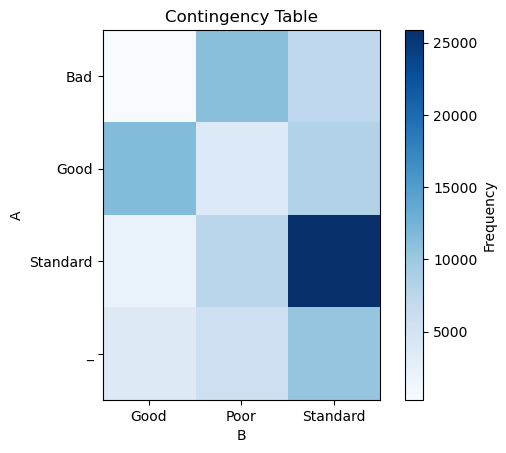

In [198]:
contingency_table = pd.crosstab(train['Credit_Mix'], train['Credit_Score'])
plt.imshow(contingency_table, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Frequency')
plt.xlabel('B')
plt.ylabel('A')
plt.title('Contingency Table')
plt.xticks(range(len(contingency_table.columns)), contingency_table.columns)
plt.yticks(range(len(contingency_table.index)), contingency_table.index)
plt.show()

- We see how the dark squares represent the correlation between the target variable and the 'Credit_Mix' atribute hence we can observe how filling the blank values with Standard would be the ideal choice

In [199]:
train['Credit_Mix']=train['Credit_Mix'].apply(lambda x:x.replace("_","Standard") if "_" in x else x)
train['Credit_Mix'].value_counts()

Credit_Mix
Standard    55152
Good        23617
Bad         18461
Name: count, dtype: int64

In [200]:
print(train['Occupation'].isna().sum())
train['Occupation'].value_counts()

0


Occupation
_______          6873
Lawyer           6390
Architect        6175
Engineer         6172
Scientist        6113
Accountant       6111
Mechanic         6099
Media_Manager    6068
Teacher          6049
Developer        6032
Entrepreneur     6016
Doctor           5916
Journalist       5906
Manager          5807
Musician         5761
Writer           5742
Name: count, dtype: int64

In [201]:
print(train['Num_of_Delayed_Payment'].isna().sum(),train['Num_of_Delayed_Payment'].dtype)
train['Num_of_Delayed_Payment'].value_counts()

6826 object


Num_of_Delayed_Payment
19      5166
17      5136
16      5015
10      5000
18      4935
        ... 
1164       1
2616       1
848_       1
4134       1
2047       1
Name: count, Length: 730, dtype: int64

In [204]:
train["Num_of_Delayed_Payment"] = train["Num_of_Delayed_Payment"].apply(filter_)
train['Num_of_Delayed_Payment'].value_counts()

Num_of_Delayed_Payment
19      5315
17      5284
10      5154
16      5148
15      5084
        ... 
2616       1
848        1
4134       1
1530       1
2047       1
Name: count, Length: 692, dtype: int64

In [209]:
train['Num_of_Delayed_Payment'].median(skipna=True)


14.0

In [210]:
train['Num_of_Delayed_Payment'].fillna(14.0, inplace=True)
train['Num_of_Delayed_Payment'].isna().sum()

0